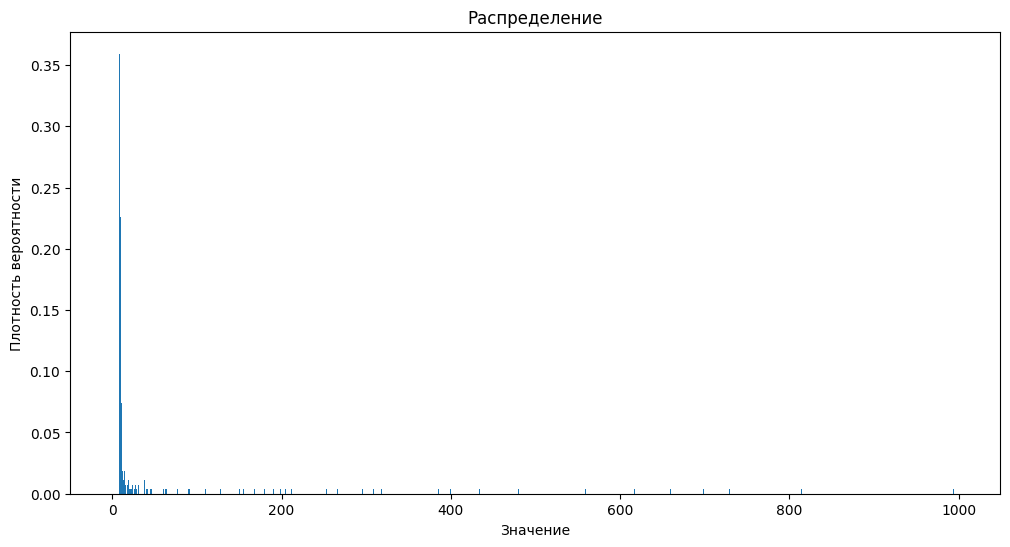

In [2]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open('var_16_lognorm.csv', 'r') as f:
    data = [float(line.strip()) for line in f.readlines()]

# Построение гистограммы распределения
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data, bins=range(0, 1000, 1), density=True)

# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Распределение')

# Вывод графика на экран
plt.show()

In [3]:
def dataSum(data):
    s = sum(data)
    return s
print("Data summ is", dataSum(data))

Data summ is 120952028.72295406


In [4]:
def dataMean(data):
    summ = dataSum(data)
    mean = summ / len(data)
    return mean
print("Data mean is", dataMean(data))

Data mean is 403173.42907651357


In [5]:
def dataMedian(data):
    dataLen = len(data)
    sortedData = sorted(data)
    if dataLen % 2 == 0:
        # если количество элементов четное, берем среднее двух средних значений
        mid = dataLen // 2
        median = (sortedData[mid-1] + sortedData[mid]) / 2
    else:
        # если количество элементов нечетное, берем среднее значение
        median = sortedData[dataLen//2]
    return median
print("Data median is", dataMedian(data))

Data median is 9.5922675


In [6]:
def dataModa(data):
    # Создаем словарь, где ключи - элементы списка, а значения - количество их повторений
    countDict = {}
    for i in data:
        if i in countDict:
            countDict[i] += 1
        else:
            countDict[i] = 1

    # Находим элемент(ы) с максимальным количеством повторений
    max_count = max(countDict.values())
    modes = []
    for key, value in countDict.items():
        if value == max_count:
            modes.append(key)

    # Возвращаем моду(ы)
    return modes
print("Data moda is", dataModa(data))

Data moda is [8.98]


In [7]:
def dataRange(data):
    return max(data) - min(data)
print("Data range is", dataRange(data))

Data range is 67609309.661269


In [8]:
def dataBiasedVariance(data):
    dataLen = len(data)
    mean = dataMean(data)
    squared_differences_sum = sum([(x - mean) ** 2 for x in data])
    return squared_differences_sum / (dataLen)
print("Data Biased Variance is", dataBiasedVariance(data))

Data Biased Variance is 22862010778114.184


In [9]:
def dataUnbiasedVariance(data):
    dataLen = len(data)
    mean = dataMean(data)
    squared_differences_sum = sum([(x - mean) ** 2 for x in data])
    return squared_differences_sum / (dataLen - 1)
print("Data Unbiased Variance is", dataUnbiasedVariance(data))

Data Unbiased Variance is 22938472352622.926


In [10]:
def dataStartMoment(data, k):
    dataLen = len(data)
    moment = sum([x**k for x in data])/dataLen
    return moment
print("Data start moment is", dataStartMoment(data, 2))

Data start moment is 23024559592027.523


In [12]:
def dataCenterMoment(data, k):
    dataLen = len(data)
    mean = dataMean(data)
    moment = sum([(x - mean) ** k for x in data])/dataLen
    return moment
print("Data center moment is", dataCenterMoment(data, 2))

Data center moment is 22862010778114.184


Здесь будет попытка получить те же параметры для обрезанной выборки

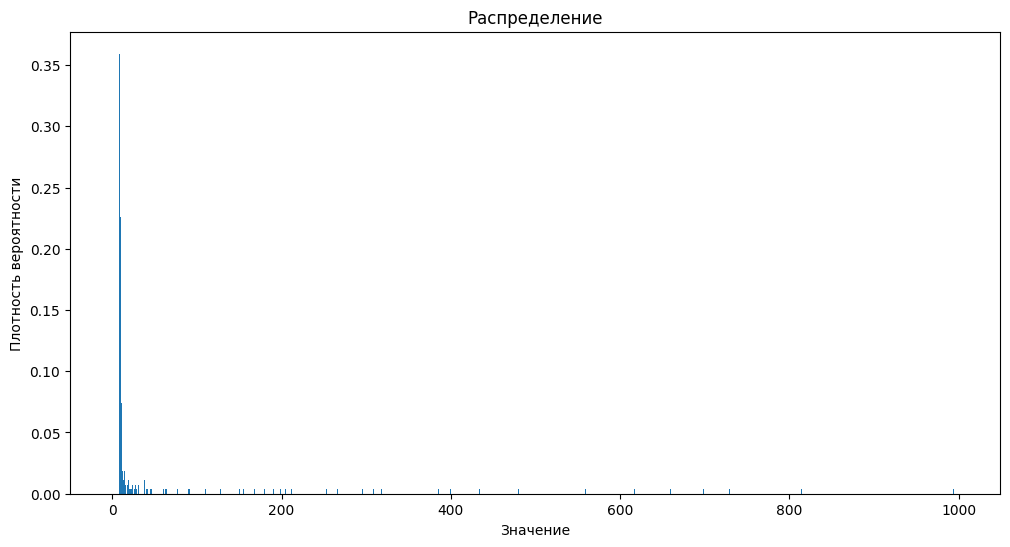

Data summ is 14863.350462
Data mean is 55.04944615555556
Data median is 9.212848999999999
Data moda is [8.98]
Data range is 984.399304
Data Biased Variance is 19669.664621239397
Data Unbiased Variance is 19742.78605105813
Data start moment is 22700.10614327281
Data center moment is 19669.664621239397


In [14]:
right_border = 1000
data_cut = [x for x in data if x < right_border]

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_cut, bins=range(0, right_border, 1), density=True)

# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Распределение')

# Вывод графика на экран
plt.show()

print("Data summ is", dataSum(data_cut))
print("Data mean is", dataMean(data_cut))
print("Data median is", dataMedian(data_cut))
print("Data moda is", dataModa(data_cut))
print("Data range is", dataRange(data_cut))
print("Data Biased Variance is", dataBiasedVariance(data_cut))
print("Data Unbiased Variance is", dataUnbiasedVariance(data_cut))
print("Data start moment is", dataStartMoment(data_cut, 2))
print("Data center moment is", dataCenterMoment(data_cut, 2))

In [ ]:
# creating class for Data
class Statistics:
    def __init__(self, data):
        self.dataArr = data
        self.dataLen = len(data)
        self.getAllParams()
        
    def dataSum(self):
        self.sum = sum(self.dataArr)
        return self.sum
    
    def dataMean(self):
        summ = self.dataSum()
        self.mean = summ / self.dataLen
        return self.mean
    
    def dataMedian(self):
        sortedData = sorted(self.dataArr)
        if self.dataLen % 2 == 0:
            # если количество элементов четное, берем среднее двух средних значений
            mid = self.dataLen // 2
            self.median = (sortedData[mid-1] + sortedData[mid]) / 2
        else:
            # если количество элементов нечетное, берем среднее значение
            self.median = sortedData[self.dataLen//2]
        return self.median
    
    def dataModa(self):
        # Создаем словарь, где ключи - элементы списка, а значения - количество их повторений
        countDict = {}
        for i in self.dataArr:
            if i in countDict:
                countDict[i] += 1
            else:
                countDict[i] = 1
        # Находим элемент(ы) с максимальным количеством повторений
        max_count = max(countDict.values())
        self.modes = []
        for key, value in countDict.items():
            if value == max_count:
                self.modes.append(key)

        # Возвращаем моду(ы)
        return self.modes
    
    def dataRange(self):
        self.range = max(self.dataArr) - min(self.dataArr)
        return self.range
    
    def dataBiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.biasedVariance = squared_differences_sum / (self.dataLen)
        return self.biasedVariance
    
    def dataUnbiasedVariance(self):
        mean = dataMean(data)
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.unbiasedVariance = squared_differences_sum / (self.dataLen - 1)
        return self.unbiasedVariance
    
    def dataStartMoment(self, k):
        moment = sum([x**k for x in self.dataArr])/self.dataLen
        return moment
    
    def dataCenterMoment(self, k):
        mean = dataMean(self.dataArr)
        moment = sum([(x - mean) ** k for x in self.dataArr])/self.dataLen
        return moment
    
    def getAllParams(self):
        self.dataSum()
        self.dataMean()
        self.dataMedian()
        self.dataModa()
        self.dataRange()
        self.dataBiasedVariance()
        self.dataUnbiasedVariance()

    def printAllParams(self):
        self.getAllParams()

        print("Data mean is", self.mean)
        print("Data median is", self.median)
        print("Data moda is", self.modes)
        print("Data range is", self.range)
        print("Data Biased Variance is", self.biasedVariance)
        print("Data Unbiased Variance is", self.unbiasedVariance)
        print("Data start moment is", self.dataStartMoment(2))
        print("Data center moment is", self.dataCenterMoment(2))

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.hist(self.dataArr, bins=range(min(self.dataArr), max(self.dataArr), 1), density=True)

        # Настройка внешнего вида графика
        ax.set_xlabel('Значение')
        ax.set_ylabel('Плотность вероятности')
        ax.set_title('Распределение')

        # Вывод графика на экран
        plt.show()
        

classedOldData = Statistics(data)
classedOldData.printAllParams()

classedCutData = Statistics(data_cut)
classedCutData.printAllParams()